## Exercise 6.5 Unsupervised ML Clustering

### This script contains the following:

#### 1. Importing libraries and data and renaming columns

#### 2. The elbow technique

#### 3. k-means clustering

#### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
# creating path folder 
path = r'C:\Users\cpaul\Documents\Career Foundry\Causes of deaths other than diseases'

# Import dataset, causes_of_deaths_merged.csv to create df
df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'causes_of_deaths_geo_cleaned_for_regression.csv'), index_col = False)

In [5]:
df.shape

(10610, 14)

In [6]:
df.head()

,Unnamed: 0,country_code,country,year,deaths,cause,total_population,gdp_value,income_group,region,sub_region,death_percentage,gdp_per_capita,income_group_id
0,0,AFG,Afghanistan,2007,8216,Conflict and Terrorism,27100536.0,9.715765e+09,Low income,Asia,Southern Asia,2.058784e-06,358.508227,0
1,1,AFG,Afghanistan,2007,0,Epidemics,27100536.0,9.715765e+09,Low income,Asia,Southern Asia,0.000000e+00,358.508227,0
2,2,AFG,Afghanistan,2007,0,Famine,27100536.0,9.715765e+09,Low income,Asia,Southern Asia,0.000000e+00,358.508227,0
3,3,AFG,Afghanistan,2007,296,Natural Disaster,27100536.0,9.715765e+09,Low income,Asia,Southern Asia,7.417236e-08,358.508227,0
4,4,AFG,Afghanistan,2007,41,Other Injuries,27100536.0,9.715765e+09,Low income,Asia,Southern Asia,1.027387e-08,358.508227,0


#### Data cleaning

In [7]:
# Drop column "Unnamed: 0"
df = df.drop(columns = ['Unnamed: 0'])

In [8]:
# cause ia a categorical variable

# Create a mapping between unique 'cause' categories and unique numeric identifiers
cause_mapping = {cause: idx for idx, cause in enumerate(df['cause'].unique())}

# Add a new numeric 'cause_id' column to your DataFrame using the mapping
df['cause_id'] = df['cause'].map(cause_mapping)

In [9]:
df.head()

,country_code,country,year,deaths,cause,total_population,gdp_value,income_group,region,sub_region,death_percentage,gdp_per_capita,income_group_id,cause_id
0,AFG,Afghanistan,2007,8216,Conflict and Terrorism,27100536.0,9.715765e+09,Low income,Asia,Southern Asia,2.058784e-06,358.508227,0,0
1,AFG,Afghanistan,2007,0,Epidemics,27100536.0,9.715765e+09,Low income,Asia,Southern Asia,0.000000e+00,358.508227,0,1
2,AFG,Afghanistan,2007,0,Famine,27100536.0,9.715765e+09,Low income,Asia,Southern Asia,0.000000e+00,358.508227,0,2
3,AFG,Afghanistan,2007,296,Natural Disaster,27100536.0,9.715765e+09,Low income,Asia,Southern Asia,7.417236e-08,358.508227,0,3
4,AFG,Afghanistan,2007,41,Other Injuries,27100536.0,9.715765e+09,Low income,Asia,Southern Asia,1.027387e-08,358.508227,0,4


In [12]:
df.columns

Index(['country_code', 'country', 'year', 'deaths', 'cause',
       'total_population', 'gdp_value', 'income_group', 'region', 'sub_region',
       'death_percentage', 'gdp_per_capita', 'income_group_id', 'cause_id'],
      dtype='object')

In [13]:
# Create a subset which contains only the 'deaths' and other numeric indicators

df_subset = df[['deaths', 'total_population', 'gdp_value', 'death_percentage', 'gdp_per_capita', 'income_group_id', 'cause_id']]

#### 2. The Elbow Technique

In [18]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [19]:
score = [kmeans[i].fit(df_subset).score(df_subset) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\cpaul\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\cpaul\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\cpaul\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\cpaul\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\cpaul\anaconda3\lib\site-packages\sklearn\clust

[-2.2627306192832193e+28,
 -5.731041952814698e+27,
 -2.280274370961389e+27,
 -1.3920544659297337e+27,
 -8.447685092929146e+26,
 -5.762975463905376e+26,
 -4.2585961961806885e+26,
 -2.999261513833021e+26,
 -2.43021387120847e+26]

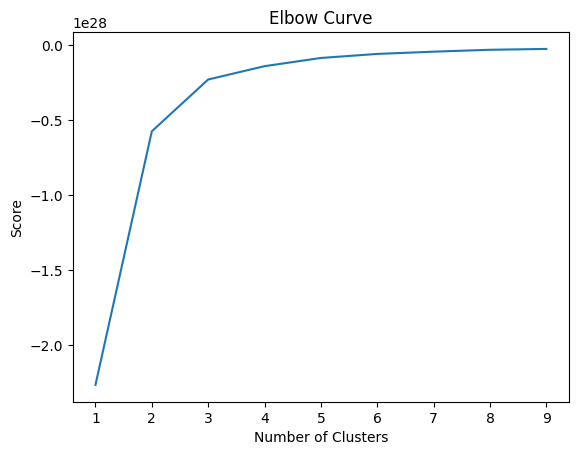

In [20]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### 3. k-means clustering

In [22]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [24]:
# Fit the k-means object to the data.

kmeans.fit(df_subset)

C:\Users\cpaul\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [26]:
df_subset['clusters'] = kmeans.fit_predict(df_subset)

C:\Users\cpaul\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\cpaul\AppData\Local\Temp\ipykernel_35948\2632181828.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['clusters'] = kmeans.fit_predict(df_subset)


In [28]:
df_subset.head()

,deaths,total_population,gdp_value,death_percentage,gdp_per_capita,income_group_id,cause_id,clusters
0,8216,27100536.0,9.715765e+09,2.058784e-06,358.508227,0,0,1
1,0,27100536.0,9.715765e+09,0.000000e+00,358.508227,0,1,1
2,0,27100536.0,9.715765e+09,0.000000e+00,358.508227,0,2,1
3,296,27100536.0,9.715765e+09,7.417236e-08,358.508227,0,3,1
4,41,27100536.0,9.715765e+09,1.027387e-08,358.508227,0,4,1


In [30]:
df_subset['clusters'].value_counts()

1    10060
0      470
2       80
Name: clusters, dtype: int64

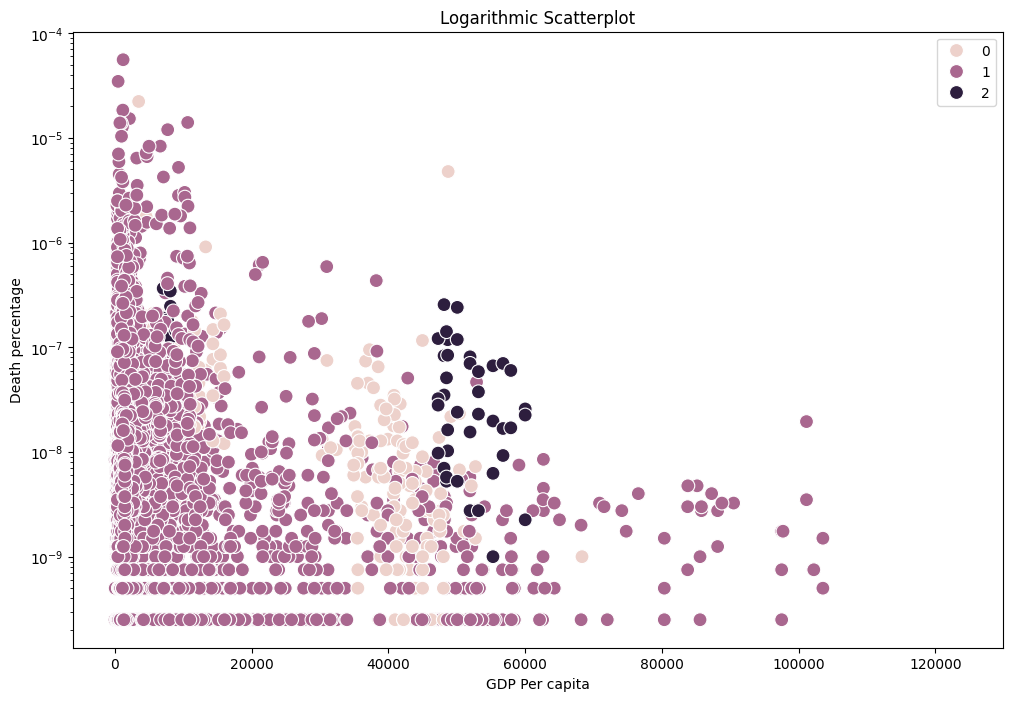

In [61]:
# Plot the clusters for the "gdp_per_capita" and "death_percentage" variables.

plt.figure(figsize=(12,8))
cluster_1 = sns.scatterplot(x=df_subset['gdp_per_capita'], y=df_subset['death_percentage'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

cluster_1.grid(False) # This removes the grid from the background.
plt.title('Logarithmic Scatterplot')
plt.xlabel('GDP Per capita') # Label x-axis.
plt.ylabel('Death percentage') # Label y-axis.
plt.yscale('log')
plt.show()

In [62]:
#Export Viz
cluster_1.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'clusters_gdppercapita_deathpercentage.png'))

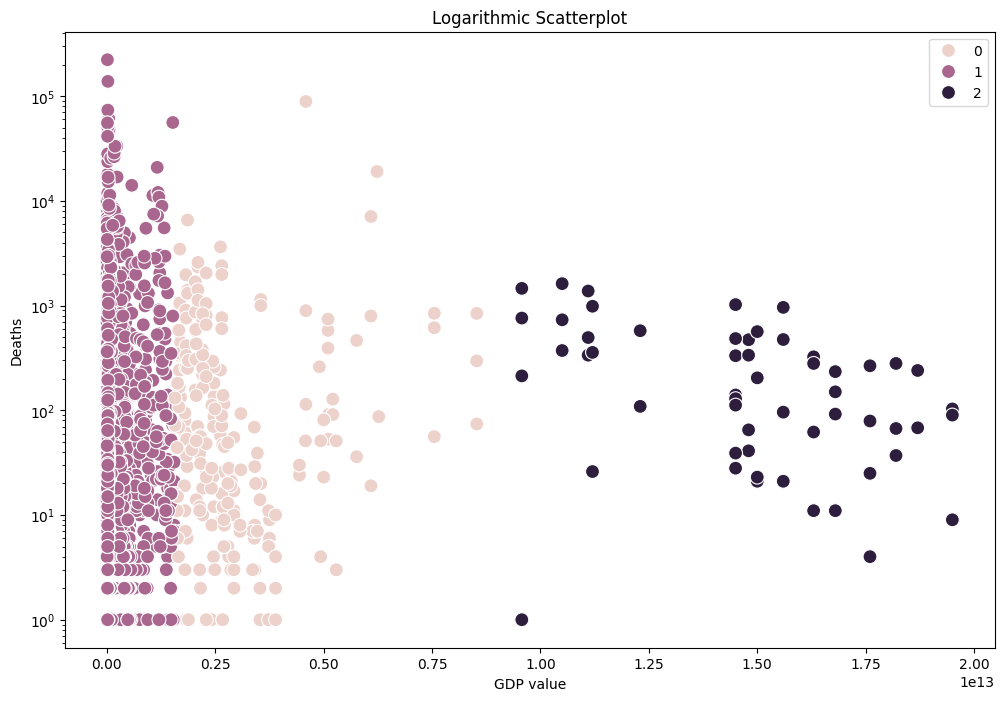

In [63]:
# Plot the clusters for the "gdp_value" and "deaths" variables.

plt.figure(figsize=(12,8))
cluster_2 = sns.scatterplot(x=df_subset['gdp_value'], y=df_subset['deaths'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

cluster_2.grid(False) # This removes the grid from the background.
plt.title('Logarithmic Scatterplot')
plt.xlabel('GDP value') # Label x-axis.
plt.ylabel('Deaths') # Label y-axis.
plt.yscale('log')
plt.show()

In [64]:
#Export Viz
cluster_2.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'clusters_gdpvalue_deaths.png'))

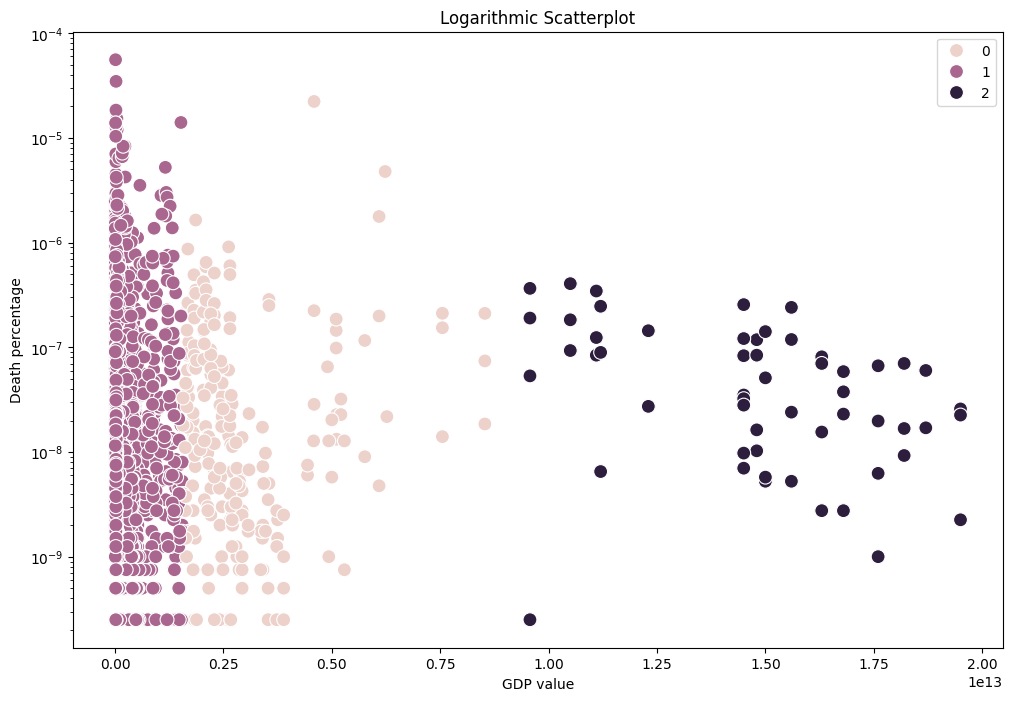

In [66]:
# Plot the clusters for the "gdp_value" and "death_percentage" variables.

plt.figure(figsize=(12,8))
cluster_3 = sns.scatterplot(x=df_subset['gdp_value'], y=df_subset['death_percentage'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

cluster_3.grid(False) # This removes the grid from the background.
plt.title('Logarithmic Scatterplot')
plt.xlabel('GDP value') # Label x-axis.
plt.ylabel('Death percentage') # Label y-axis.
plt.yscale('log')
plt.show()

In [67]:
#Export Viz
cluster_3.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'clusters_gdpvalue_deathpercentage.png'))

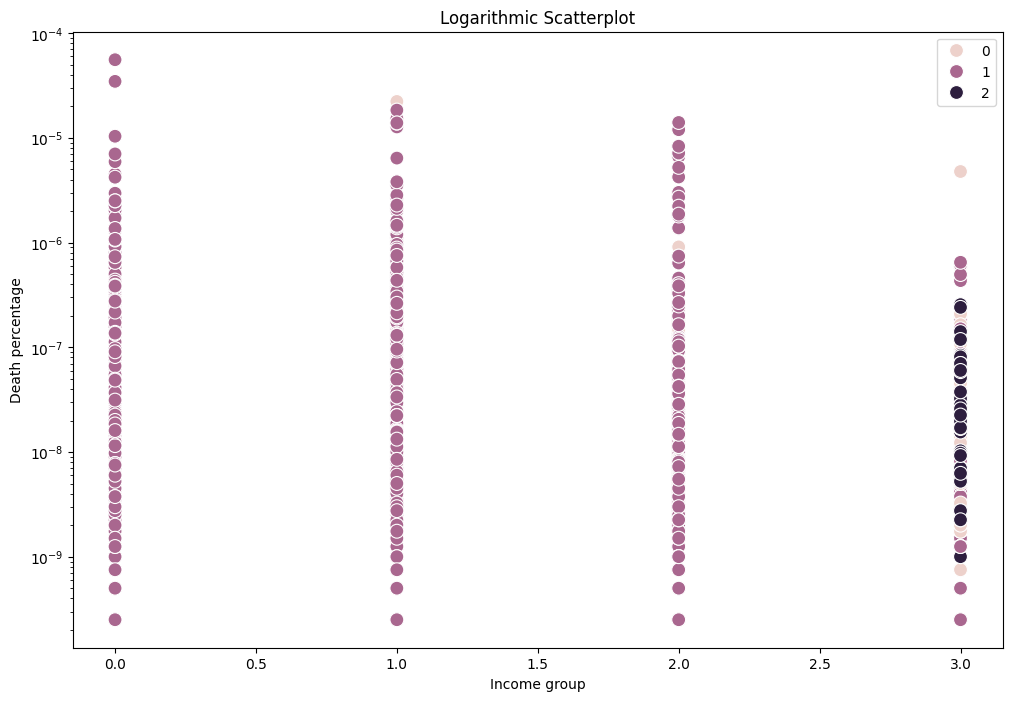

In [68]:
# Plot the clusters for the "income_group_id" and "death_percentage" variables.
# Note: "income_group_id" is the numeric coding for the "income_group" column since it is categorical variable

plt.figure(figsize=(12,8))
cluster_4 = sns.scatterplot(x=df_subset['income_group_id'], y=df_subset['death_percentage'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

cluster_4.grid(False) # This removes the grid from the background.
plt.title('Logarithmic Scatterplot')
plt.xlabel('Income group') # Label x-axis.
plt.ylabel('Death percentage') # Label y-axis.
plt.yscale('log')
plt.show()

In [69]:
#Export Viz
cluster_4.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'clusters_incomegroup_deathpercentage.png'))

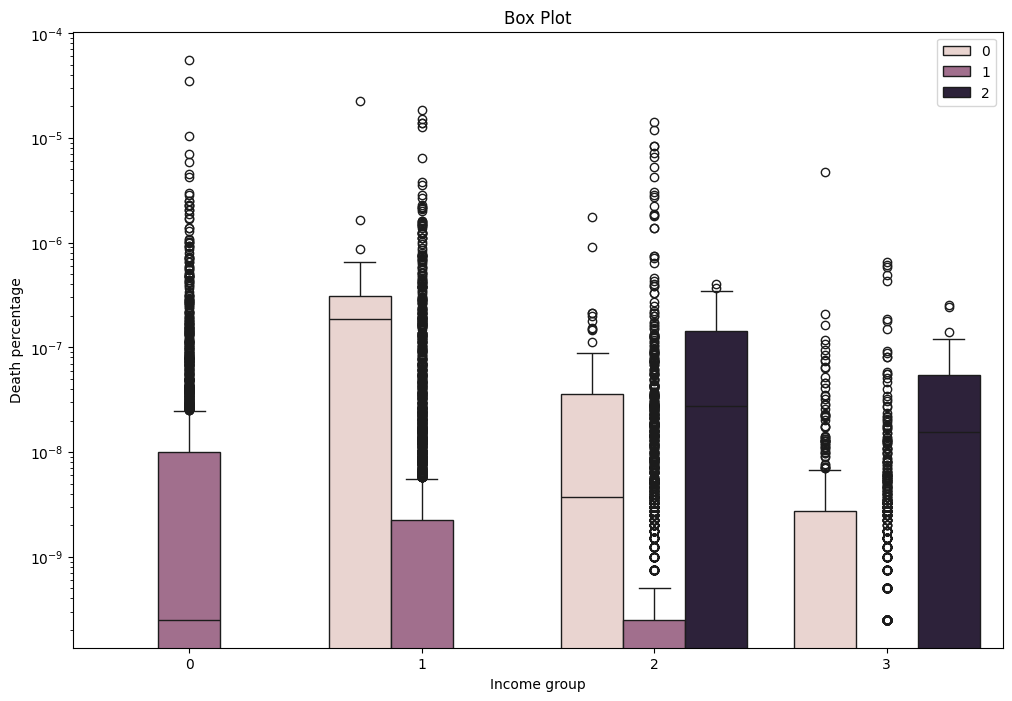

In [76]:
# Create a box plot since the clusters are overlapping on each datapoint in the x-axis.
# Plot the clusters for the "income_group_id" and "death_percentage" variables.
# Note: "income_group_id" is the numeric coding for the "income_group" column since it is categorical variable

plt.figure(figsize=(12, 8))
cluster_5 = sns.boxplot(x=df_subset['income_group_id'], y=df_subset['death_percentage'], hue=kmeans.labels_)

cluster_5.set_title('Box Plot')
cluster_5.set_xlabel('Income group')
cluster_5.set_ylabel('Death percentage')
cluster_5.set_yscale('log')

# Optional: Rotate the x-axis labels for better readability
# plt.xticks(rotation=45)

plt.grid(False)
plt.show()


In [77]:
#Export Viz
cluster_5.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'clusters_box_incomegroup_deathpercentage.png'))

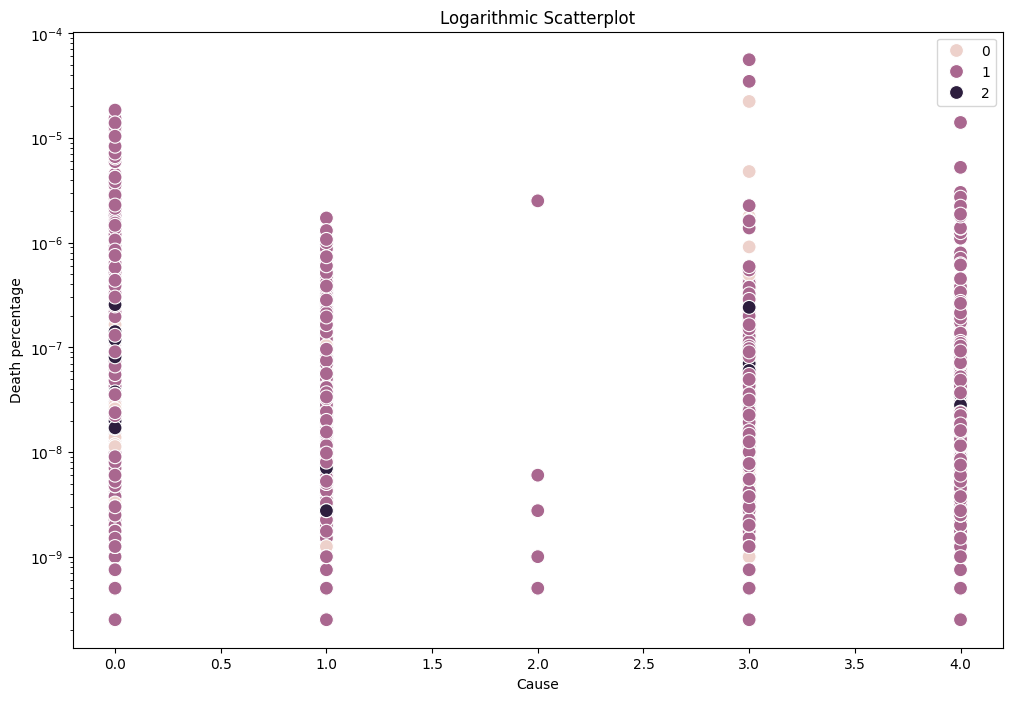

In [74]:
# Plot the clusters for the "cause_id" and "death_percentage" variables.
# Note: "cause_id" is the numeric coding for the "cause" column since it is categorical variable

plt.figure(figsize=(12,8))
cluster_6 = sns.scatterplot(x=df_subset['cause_id'], y=df_subset['death_percentage'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

cluster_6.grid(False) # This removes the grid from the background.
plt.title('Logarithmic Scatterplot')
plt.xlabel('Cause') # Label x-axis.
plt.ylabel('Death percentage') # Label y-axis.
plt.yscale('log')
plt.show()

In [75]:
#Export Viz
cluster_6.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'clusters_cause_deathpercentage.png'))

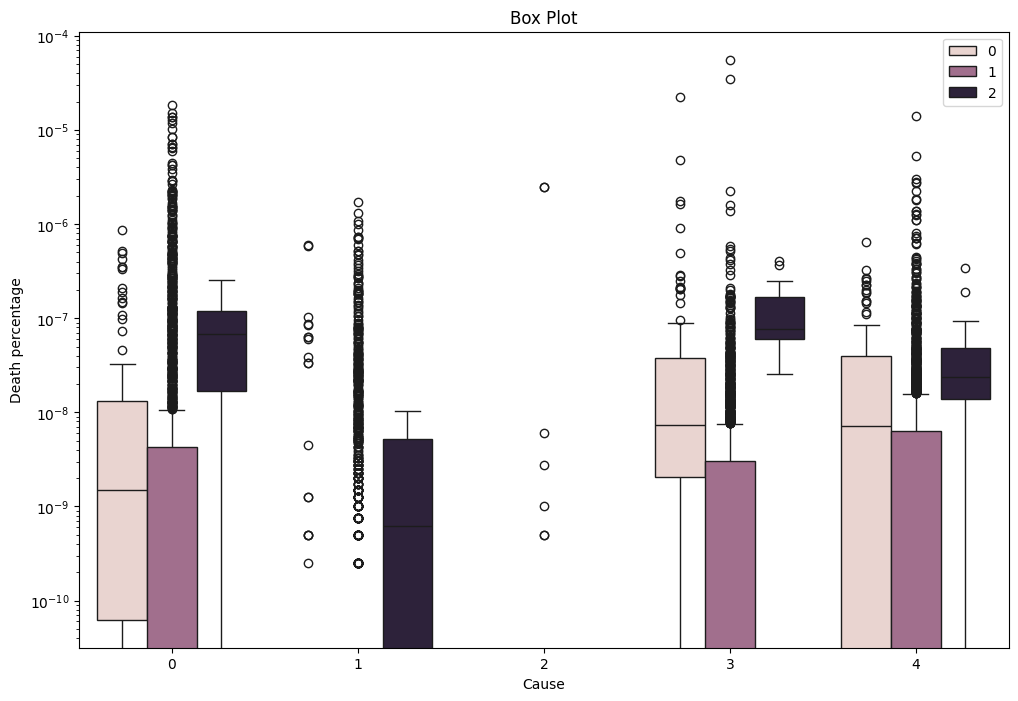

In [78]:
# Create a box plot
# Plot the clusters for the "cause_id" and "death_percentage" variables.
# Note: "cause_id" is the numeric coding for the "cause" column since it is categorical variable

plt.figure(figsize=(12, 8))
cluster_7 = sns.boxplot(x=df_subset['cause_id'], y=df_subset['death_percentage'], hue=kmeans.labels_)

cluster_7.set_title('Box Plot')
cluster_7.set_xlabel('Cause')
cluster_7.set_ylabel('Death percentage')
cluster_7.set_yscale('log')

# Optional: Rotate the x-axis labels for better readability
# plt.xticks(rotation=45)

plt.grid(False)
plt.show()

In [79]:
#Export Viz
cluster_7.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'clusters_box_cause_deathpercentage.png'))

In [54]:
# Define a dictionary to map cluster values to colors
cluster_colors = {2: 'dark purple', 1: 'purple', 0: 'pink'}

# Use the map method to create a new 'cluster' column based on the mapping
# df_subset['cluster'] = df_subset['clusters'].map(cluster_colors)

# Use .loc for assignment to avoid the warning
df_subset.loc[df_subset['clusters'] == 2, 'cluster'] = 'dark purple'
df_subset.loc[df_subset['clusters'] == 1, 'cluster'] = 'purple'
df_subset.loc[df_subset['clusters'] == 0, 'cluster'] = 'pink'



In [55]:
df_subset.groupby('cluster').agg({'death_percentage':['mean', 'median'], 
                                  'gdp_per_capita':['mean', 'median'],
                                  'gdp_value':['mean', 'median'], 
                                  'deaths':['mean', 'median'], 
                                  'income_group_id':['mean', 'median'],
                                  'cause_id':['mean', 'median']})

death_percentage               gdp_per_capita                \
                        mean        median           mean        median   
cluster                                                                   
dark purple     5.453611e-08  1.591198e-08   38596.339702  48581.187656   
pink            9.820267e-08  0.000000e+00   31088.864913  38712.317236   
purple          4.945242e-08  0.000000e+00   11620.187147   4340.113910   

                gdp_value                    deaths        income_group_id  \
                     mean        median        mean median            mean   
cluster                                                                      
dark purple  1.476062e+13  1.490000e+13  217.637500   63.5        2.687500   
pink         2.986809e+12  2.610000e+12  391.897872    0.0        2.595745   
purple       1.337659e+11  2.396596e+10  197.350000    0.0        1.591948   

                   cause_id         
            median     mean median  
cluster                             
dark purple    3.0      2.0    2.0  
pink           3.0      2.0    2.0  
purple         2.0      2.0    2.0

**Conclusions:**

**What could these results be useful for?**

In [58]:
df_subset.columns

Index(['deaths', 'total_population', 'gdp_value', 'death_percentage',
       'gdp_per_capita', 'income_group_id', 'cause_id', 'clusters', 'cluster'],
      dtype='object')

In [59]:
df_subset.head()

,deaths,total_population,gdp_value,death_percentage,gdp_per_capita,income_group_id,cause_id,clusters,cluster
0,8216,27100536.0,9.715765e+09,2.058784e-06,358.508227,0,0,1,purple
1,0,27100536.0,9.715765e+09,0.000000e+00,358.508227,0,1,1,purple
2,0,27100536.0,9.715765e+09,0.000000e+00,358.508227,0,2,1,purple
3,296,27100536.0,9.715765e+09,7.417236e-08,358.508227,0,3,1,purple
4,41,27100536.0,9.715765e+09,1.027387e-08,358.508227,0,4,1,purple


In [57]:
# Export the df_subset dataset 
# Created a new column cause_id to codify the cause categorical variable.
# created new columns, clusters (cluster id) and cluster(cluster name with color) 

df_subset.to_csv(os.path.join(path, 'Data','Prepared Data', 'causes_of_deaths_clustering.csv'))